<a href="https://colab.research.google.com/github/arizonaCameraLab/computationalImaging/blob/master/Chapter3ImageEstimation/Upscale_Images_with_Pretrained_super_image_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pretrained super image models
## David Brady
## University of Arizona
## Spring 2024

This notebook uses the code on github at https://github.com/eugenesiow/super-image to upscale images. Code below is directly from the github source with just images and model parameters changed. This notebook runs with a gpu and high ram.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import cv2



In [2]:
pip install rawpy==0.20.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 2.7 MB/s eta 0:00:00


In [3]:
import rawpy

# Upscale Images with Pre-trained `super-image` Models

---

[Github](https://github.com/eugenesiow/super-image) | All Models @ [huggingface.co](https://huggingface.co/models?filter=super-image)

---

Notebook to use the `super-image` library to quickly upscale and image.

The technique used is applying a pre-trained deep-learning model to restore a high resolution (HR) image from a single low resolution (LR) image. This is also called image super resolution.

The notebook is structured as follows:
* Setting up the Environment
* Using the Model (Running Inference)

## Setting up the Environment

#### Install the library

We will install the `super-image` library using `pip install`.

In [4]:
!pip install -qq super-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 59.1 MB/s eta 0:00:00


## Using the Model (Running Inference)

Next we run a few lines of code to:

* `Image.open` and `requests.get` - Download an image from a URL (website) and store this as the `image` variable.
* `EdsrModel.from_pretrained` - Download and load a small, pre-trained deep-learning model to the `model` variable.
* `ImageLoader.load_image` - Load the image into the `model` using the `ImageLoader` helper.
* Use the model to run inference on the image (`inputs`).
* `ImageLoader.save_image` - Save the upscaled image output as a `.png` file using the `ImageLoader` helper.
* `ImageLoader.save_compare` - Save a `.png` that compares our upscaled image from the model with a baseline image using `Bicubic` upscaling.

In [5]:
!wget -O hammer.zip https://arizona.box.com/shared/static/xlk5wza8k3vb47aih7hohc27mb7c1kjg
!unzip hammer

--2024-07-16 22:50:27--  https://arizona.box.com/shared/static/xlk5wza8k3vb47aih7hohc27mb7c1kjg
Resolving arizona.box.com (arizona.box.com)... 74.112.186.144
Connecting to arizona.box.com (arizona.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/xlk5wza8k3vb47aih7hohc27mb7c1kjg [following]
--2024-07-16 22:50:28--  https://arizona.box.com/public/static/xlk5wza8k3vb47aih7hohc27mb7c1kjg
Reusing existing connection to arizona.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://arizona.app.box.com/public/static/xlk5wza8k3vb47aih7hohc27mb7c1kjg [following]
--2024-07-16 22:50:28--  https://arizona.app.box.com/public/static/xlk5wza8k3vb47aih7hohc27mb7c1kjg
Resolving arizona.app.box.com (arizona.app.box.com)... 74.112.186.144
Connecting to arizona.app.box.com (arizona.app.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: h

In [6]:

raw = rawpy.imread('hammer/hammer.dng')

In [9]:
rgb=np.rot90(raw.postprocess())
jpg=plt.imread('hammer/hammer.jpg')

(-0.5, 249.5, 249.5, -0.5)

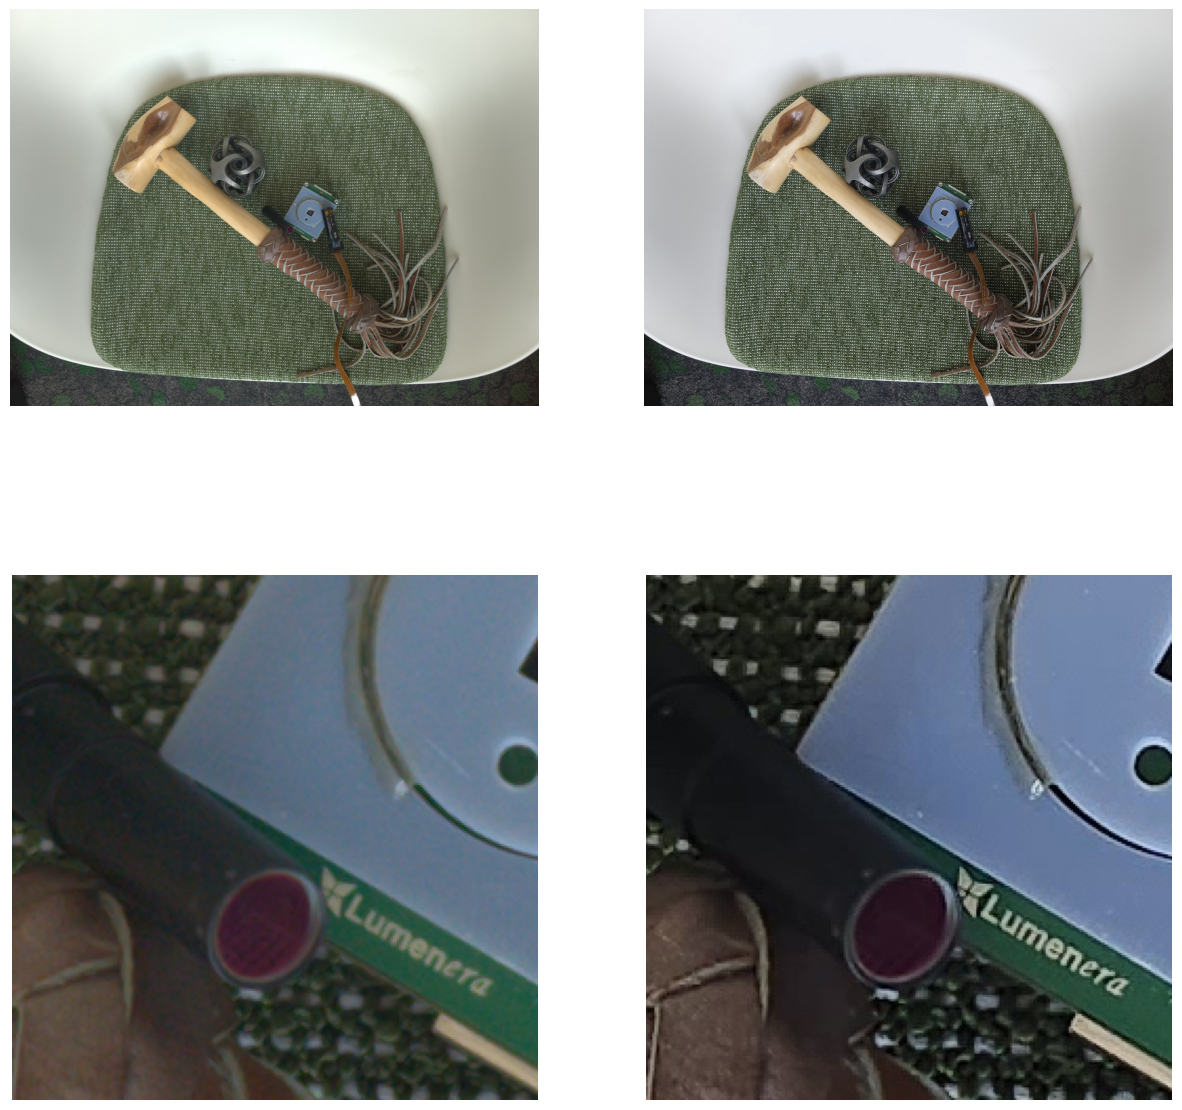

In [17]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(rgb)
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(jpg)
plt.axis('off')
plt.subplot(2,2,3)
plt.imshow(rgb[1500:1750,2000:2250])
plt.axis('off')
plt.subplot(2,2,4)
plt.imshow(jpg[1500:1750,2000:2250])
plt.axis('off')

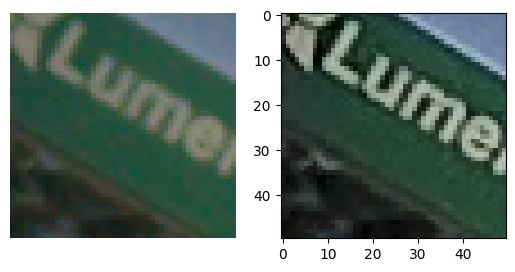

In [19]:
plt.subplot(1,2,1)
plt.imshow(rgb[1650:1700,2150:2200])
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(jpg[1650:1700,2150:2200])

In [26]:
cv2.imwrite('rgb.png', rgb[1500:1750,2000:2250])
cv2.imwrite( 'jpg.png',jpg[1500:1750,2000:2250])

True

In [27]:
from super_image import EdsrModel, ImageLoader
from PIL import Image
import requests

#url = 'https://paperswithcode.com/media/datasets/Set5-0000002728-07a9793f_zA3bDjj.jpg'
#image = Image.open(requests.get(url, stream=True).raw)
image = Image.open('./rgb.png')

model = EdsrModel.from_pretrained('eugenesiow/edsr-base', scale=2)
inputs = ImageLoader.load_image(image)
preds = model(inputs)

ImageLoader.save_image(preds, './scaled_2x.png')
ImageLoader.save_compare(inputs, preds, './scaled_2x_compare.png')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:671: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(


https://huggingface.co/eugenesiow/edsr-base/resolve/main/pytorch_model_2x.pt


/usr/local/lib/python3.10/dist-packages/super_image/data/loader.py:14: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:274.)
  return torch.as_tensor([lr])


View the comparison image to see, visually, how our model performed (on the right) against the baseline bicubic method (left).

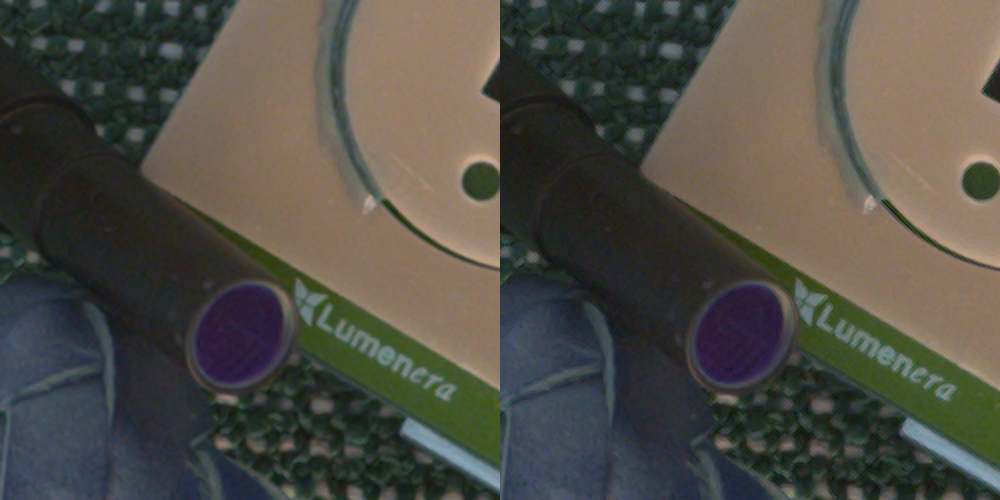

In [28]:

from google.colab.patches import cv2_imshow

img = cv2.imread('./scaled_2x_compare.png')
cv2_imshow(img)

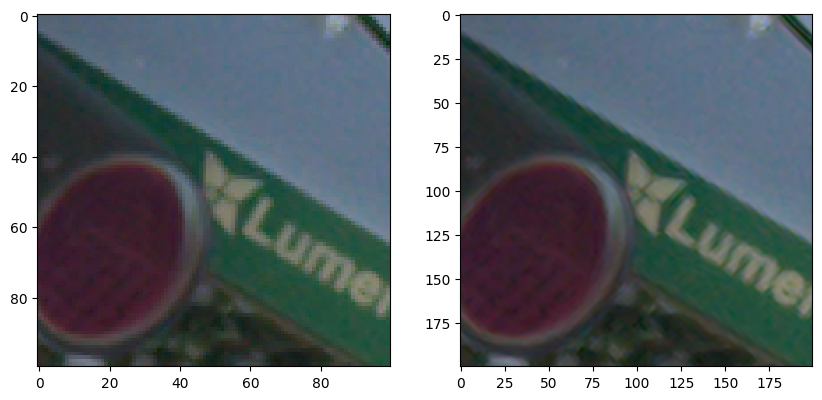

In [29]:
plt.figure(figsize=(10,10))
pop=cv2.imread('./scaled_2x.png')
img=cv2.imread('./rgb.png')
plt.subplot(1,2,1)
plt.imshow(img[100:200,100:200,:])
plt.subplot(1,2,2)
plt.imshow(pop[200:400,200:400,:])

## EDSR 4x upsampling

pytorch_model_4x.pt:   0%|          | 0.00/6.10M [00:00<?, ?B/s]

https://huggingface.co/eugenesiow/edsr-base/resolve/main/pytorch_model_4x.pt


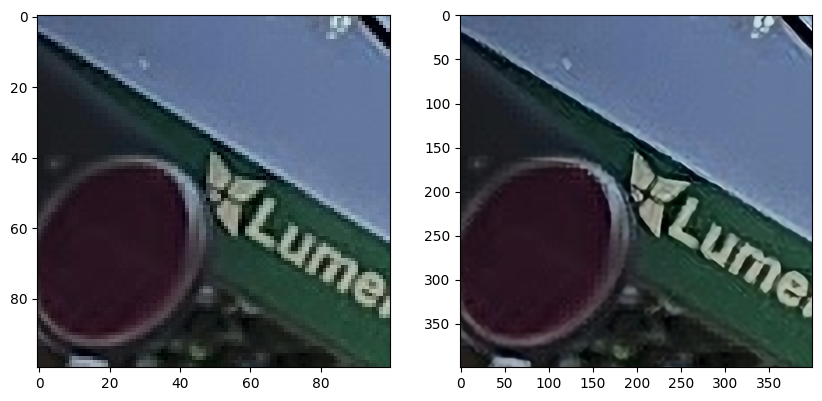

In [30]:
image = Image.open('./jpg.png')
model = EdsrModel.from_pretrained('eugenesiow/edsr-base', scale=4)
inputs = ImageLoader.load_image(image)
preds = model(inputs)

ImageLoader.save_image(preds, './scaled_4x.png')
plt.figure(figsize=(10,10))
EDSR4x=cv2.imread('./scaled_4x.png')
img=cv2.imread('./jpg.png')
plt.subplot(1,2,1)
plt.imshow(img[100:200,100:200,:])
plt.subplot(1,2,2)
plt.imshow(EDSR4x[400:800,400:800,:])


## MSRN 4x

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:671: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(


https://huggingface.co/eugenesiow/mdsr/resolve/main/pytorch_model_4x.pt


Text(0.5, 1.0, 'EDSR')

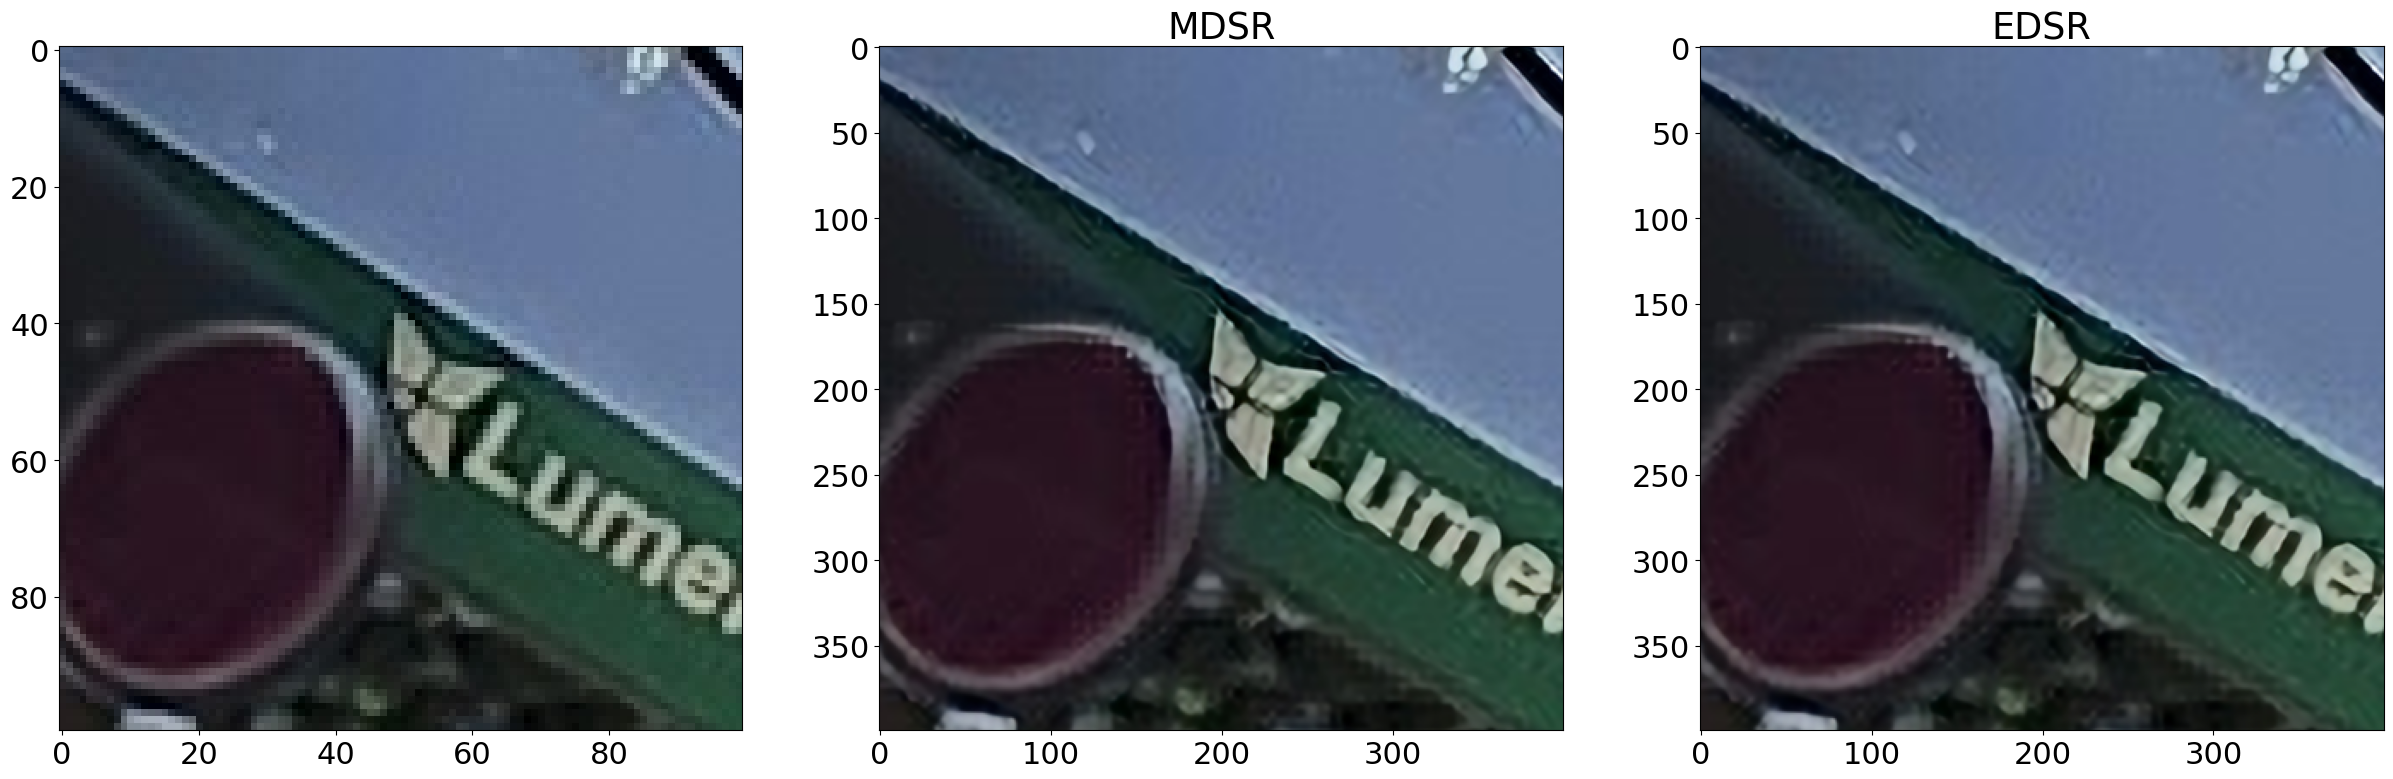

In [32]:
from super_image import MdsrModel
plt.rcParams.update({'font.size': 22})
model = MdsrModel.from_pretrained('eugenesiow/mdsr', scale=4)
preds = model(inputs)

ImageLoader.save_image(preds, './scaled_4x.png')
plt.figure(figsize=(30,10), )
pop=cv2.imread('./scaled_4x.png')
img=cv2.imread('./jpg.png')
plt.subplot(1,3,1)
plt.imshow(img[100:200,100:200,:])
plt.subplot(1,3,2)
plt.imshow(pop[400:800,400:800,:])
plt.title('MDSR')
plt.subplot(1,3,3)
plt.imshow(EDSR4x[400:800,400:800,:])
plt.title('EDSR')
